# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data

In [2]:
df=pd.read_csv('Salary_data.csv')

In [3]:
df.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


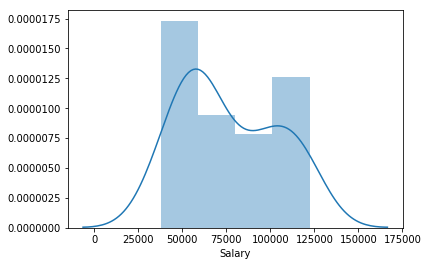

In [5]:
sns.distplot(df['Salary'])

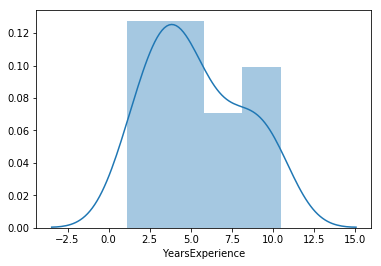

In [6]:
sns.distplot(df['YearsExperience'])

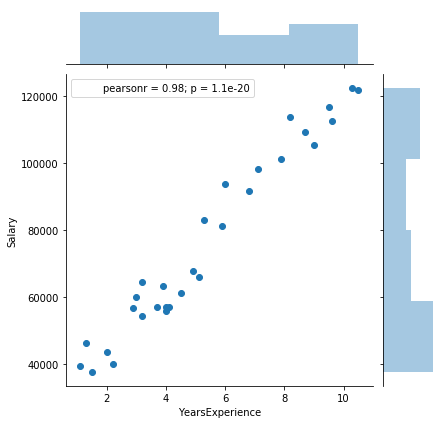

In [7]:
sns.jointplot(x='YearsExperience',y='Salary',data=df)

# Regression Analysis

In [8]:
X=df['YearsExperience']
y=df['Salary']

#### Training and Testing 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=0)

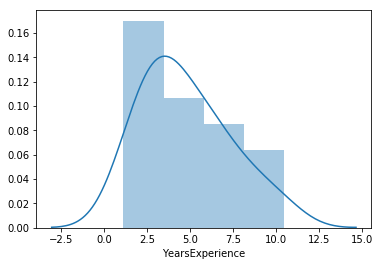

In [11]:
sns.distplot(X_train)

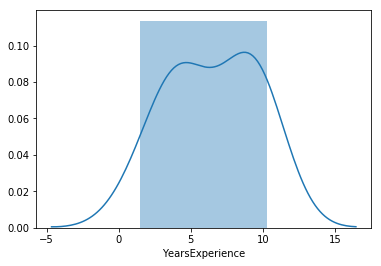

In [12]:
sns.distplot(X_test)

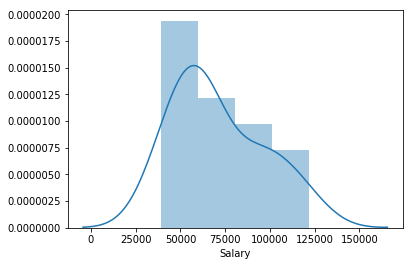

In [13]:
sns.distplot(y_train)

#### Building Model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
y_train1=y_train.values.reshape(-1,1)

In [17]:
X_train1=X_train.values.reshape(-1,1)

In [18]:
lm.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print('Intercept: ',lm.intercept_)

Intercept:  [ 26816.19224403]


In [20]:
print('Coefficient: ',lm.coef_)

Coefficient:  [[ 9345.94244312]]


#### Model

y = 26816.19 + 9345.94X

Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in **YearsExperience** is associated with an **increase of \$9345.94 ** in **Salary**.

# Predicting

In [21]:
X_test1=X_test.values.reshape(-1,1)

In [22]:
y_test1=y_test.values.reshape(-1,1)

In [23]:
predictions = lm.predict(X_test1)

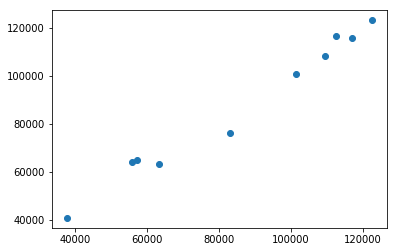

In [24]:
plt.scatter(y_test1,predictions)

#### Residual Histogram 

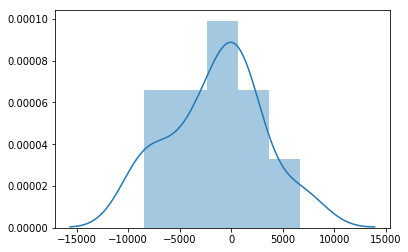

In [25]:
sns.distplot((y_test1-predictions),bins=5);

# Regression Evaluation 

In [26]:
from sklearn import metrics

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test1, predictions))
print('MSE:', metrics.mean_squared_error(y_test1, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, predictions)))

MAE: 3426.42693743
MSE: 21026037.3295
RMSE: 4585.41572047


**Conclusion**: The model shows a strong positive relationship between Years of Experiences and Salary. As mention above, Holding all other features fixed, a 1 unit increase in YearsExperience is associated with an increase of $9345.94 in Salary.